In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [8]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Dropout(0.25))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss="SparseCategoricalCrossentropy",optimizer="adam",metrics=["accuracy"])

history=model.fit(X_train,Y_train,epochs=20,validation_split=0.2,batch_size=128)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5991 - loss: 5.6451 - val_accuracy: 0.9523 - val_loss: 0.1569
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9253 - loss: 0.2460 - val_accuracy: 0.9761 - val_loss: 0.0846
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9531 - loss: 0.1537 - val_accuracy: 0.9799 - val_loss: 0.0658
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9633 - loss: 0.1148 - val_accuracy: 0.9852 - val_loss: 0.0541
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9719 - loss: 0.0924 - val_accuracy: 0.9857 - val_loss: 0.0496
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9747 - loss: 0.0807 - val_accuracy: 0.9868 - val_loss: 0.0450
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0677 - val_accuracy: 0.9862 - val_loss: 0.0468
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.0586 - val_accuracy: 0.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,160 (1.30 MB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 226,774 (885.84 KB)

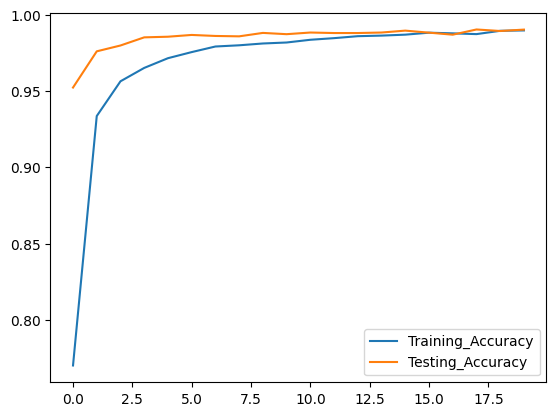

In [11]:
plt.plot(history.history["accuracy"],label="Training_Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing_Accuracy")
plt.legend()

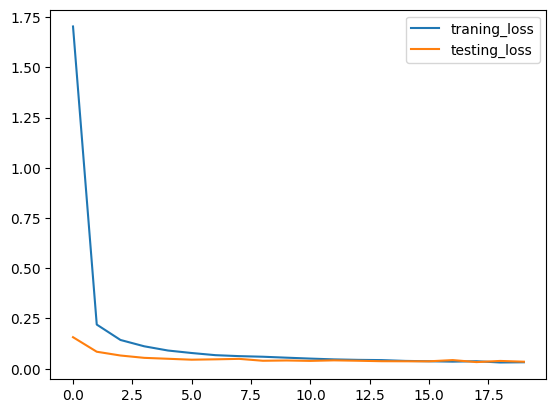

In [12]:
plt.plot(history.history["loss"],label="traning_loss")
plt.plot(history.history["val_loss"],label="testing_loss")
plt.legend()

In [13]:
y_predict=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [14]:
test_results=np.argmax(y_predict,axis=1)

In [15]:
test_results

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
print(f"Confusion matrix is: {confusion_matrix(Y_test,test_results)}")
print(f"Classification report is: {classification_report(Y_test,test_results)}")
print(f"Accuracy score is: {accuracy_score(Y_test,test_results)}")

Confusion matrix is: [[ 973    2    0    0    1    0    3    1    0    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    1 1020    3    1    0    0    5    1    0]
 [   0    0    0 1002    0    5    0    0    2    1]
 [   0    2    0    0  977    0    0    0    0    3]
 [   1    0    0    3    0  883    2    1    1    1]
 [   1    3    0    0    1    3  948    0    2    0]
 [   0    2    5    2    1    0    0 1016    0    2]
 [   5    1    1    2    1    1    1    0  961    1]
 [   0    2    0    0   10    4    0    5    3  985]]
Classification report is:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99

In [18]:
model.save("MNIST_CNN_MODEL.h5")